In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
fpp_all = pd.read_csv('fpp_final_table.csv', index_col=0)
fpp_all.count()

koi.1                    8826
rprs                     6267
secthresh                6267
maxrad                   6267
pr_heb                   5987
pr_eb                    5987
pr_beb                   5987
L_tot                    6078
fp                       6078
FPP                      5987
rp                       4812
disposition              8826
prob_ontarget            6787
pos_prob_score           7470
not_transitlike          8826
significant_secondary    8826
centroid_offset          8826
ephem_match              8826
dtype: int64

In [52]:
#4115.01 -- variable star?  rprs too big

fpp_all.ix['K00087.01']

koi.1                    K00087.01
rprs                         0.022
secthresh                       98
maxrad                        1.05
pr_heb                    4.11e-08
pr_eb                       0.0108
pr_beb                    3.11e-05
L_tot                       0.6955
fp                           0.218
FPP                         0.0108
rp                        2.243069
disposition              CONFIRMED
prob_ontarget                    1
pos_prob_score                   1
not_transitlike              False
significant_secondary        False
centroid_offset              False
ephem_match                  False
Name: K00087.01, dtype: object

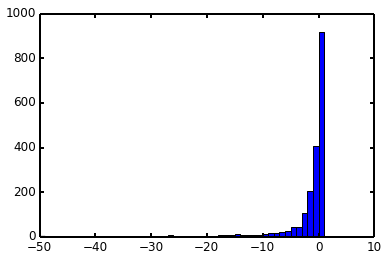

In [63]:
ok = fpp_all['L_tot'] > 0
plt.hist(np.log10(fpp_all[ok]['L_tot']), bins=range(-50,2));

In [3]:
confirmed = fpp_all['disposition'] == 'CONFIRMED'
known_fp = fpp_all['disposition'] == 'FALSE POSITIVE'
candidate = fpp_all['disposition'] == 'CANDIDATE'
low_fpp = fpp_all['FPP'] < 0.01
high_fpp = fpp_all['FPP'] > 0.9
on_target = fpp_all['prob_ontarget'] > 0.99

fpp_calculated = fpp_all[np.isfinite(fpp_all['FPP']) & np.isfinite(fpp_all['rp'])]
d = fpp_calculated

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def fpp_summaryplot(data=fpp_calculated,fig=None,symbol='o',ms=1,color='k',
                    markrs=[1,1.5,2,2.5,3,4,10],nbins=12,alpha=0.5,
                    title=None,hlineval=0.01,labelpos=(0.8,0.08),
                    summarylabel=True,erasedata=None,titlefontsize=20,
                    titlexy=(0.25,0.85), **kwargs):
    
    data = data.sort('rp')
    inds = np.arange(len(data))
    data.index = inds
    
    ypts = data['FPP'].clip(1e-4,1)
    xpts = np.arange(len(data))
    plt.semilogy(ypts,symbol,ms=ms,color=color,alpha=alpha,**kwargs)
        
    if erasedata is not None:
        plt.semilogy(ypts,symbol,ms=ms,color=color,alpha=alpha,**kwargs)

    plt.ylim(ymin=8e-5)
    xmax = inds.max()+1
    plt.xlim(xmax=xmax)
    plt.xticks([])

    ax = plt.gca()

    plt.axhline(hlineval,color='k',lw=2)

    for r in markrs:
        i = np.argmin(np.absolute(data['rp'][inds]-r))
        ax.axvline(i,color='k',lw=3,ls=':')
        ax.annotate(r'%.1f' % r,xy=(float(i)/xmax,-0.05),xycoords='axes fraction',ha='center',
                    annotation_clip=False,fontsize=14)
        

    if nbins is not None:
        N = len(ypts)
        binsize = N/nbins
        xbins = []
        ybins = []
        yerrs = []
        for i in range(nbins):
            xbins.append((xpts[i*binsize:(i+1)*binsize]).mean())
            ybins.append(np.median(ypts[i*binsize:(i+1)*binsize]))
            yerrs.append((ypts[i*binsize:(i+1)*binsize]).std())
        #plt.errorbar(xbins,ybins,yerr=yerrs,color=linecolor,fmt='o',ms=5)
        plt.plot(xbins,ybins,'wo',ms=15)
        plt.plot(xbins,ybins,'ko',ms=13)
        plt.plot(xbins,ybins,'ro',ms=12)

    plt.xlabel('Planet Radius [$R_\oplus$]',labelpad=30)
    plt.ylabel('False Positive Probability')

    if title is not None:
        plt.annotate(title,xy=titlexy,xycoords='axes fraction',
                     fontsize=titlefontsize,
                     bbox=dict(boxstyle='round',fc='w',lw=2),ha='center')

    if summarylabel:
        N = float(len(data))
        gt_50pct = (data['FPP'] > 0.5).sum()
        lt_1pct = (data['FPP'] < 0.01).sum()
        #lt_03pct = (data['FPP'] < 0.003).sum()
        plt.annotate('%i/%i FPP > 50%%\n%i/%i FPP < 1%%' % 
                     (gt_50pct,N,lt_1pct,N),xy=labelpos,xycoords='axes fraction',
                     fontsize=15,bbox=dict(boxstyle='round',fc='w',lw=2),ha='center')


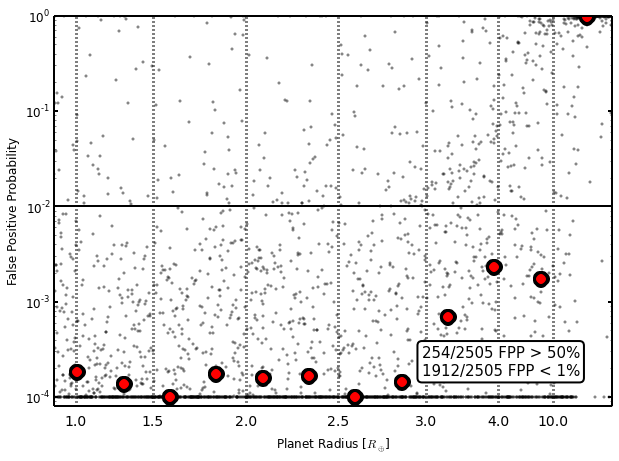

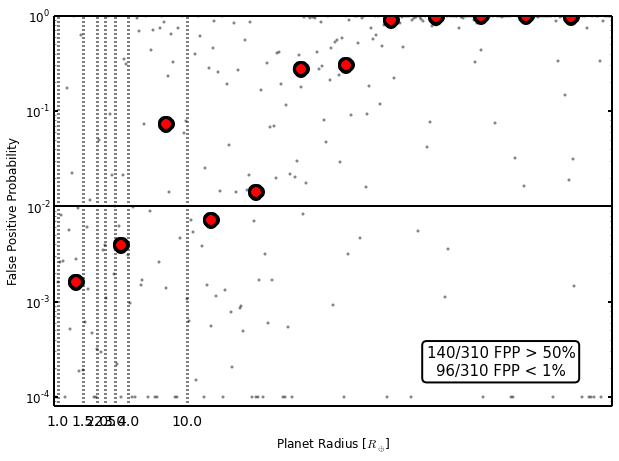

In [66]:
%matplotlib inline
plt.figure(figsize=(10,7))
fpp_summaryplot(d.query('disposition != "FALSE POSITIVE" and pos_prob_score > 0.7'));
plt.figure(figsize=(10,7))
fpp_summaryplot(d.query('(disposition == "FALSE POSITIVE") and prob_ontarget > 0.99 and L_tot > 1e-20'));

In [5]:
from keputils import koiutils as ku
from keputils import kicutils as kicu

starprops = pd.read_table('starprops_all.txt', delim_whitespace=True)
starprops['koistar'] = starprops['koi'].apply(ku.koistar)

sp = starprops.groupby('koistar').first()

huber_sp = kicu.DATA.ix[ku.DATA.ix[sp['koi'], 'kepid']]

                        
len(starprops), len(sp), len(huber_sp)


(7213, 6066, 6066)

In [66]:
huber_sp.columns

Index([u'kepid', u'tm_designation', u'teff', u'teff_err1', u'teff_err2', u'logg', u'logg_err1', u'logg_err2', u'feh', u'feh_err1', u'feh_err2', u'mass', u'mass_err1', u'mass_err2', u'radius', u'radius_err1', u'radius_err2', u'dens', u'dens_err1', u'dens_err2', u'age', u'age_err1', u'age_err2', u'prov_sec', u'kepmag', u'ebminusv', u'ebminusv_err1', u'ebminusv_err2', u'limbdark_mod', u'limbdark_coeff1', u'limbdark_coeff2', u'limbdark_coeff3', u'limbdark_coeff4', u'dist', u'dist_err1', u'dist_err2', u'plx', u'plx_err1', u'plx_err2', u'pmtot', u'pmtot_err1', u'pmtot_err2', u'pmra', u'pmra_err1', u'pmra_err2', u'pmdec', u'pmdec_err1', u'pmdec_err2', u'srot', u'srot_err1', u'srot_err2', u'phot_range', u'phot_range_err1', u'phot_range_err2', u'contamin', u'nconfp', u'nkoi', u'ntce', u'st_comment', u'st_delivname', u'st_vet_date_str', u'ra', u'ra_str', u'dec', u'dec_str', u'st_quarters', u'teff_prov', u'logg_prov', u'feh_prov'], dtype='object')

In [104]:
from keputils import koiutils as ku
from keputils import kicutils as kicu
import numpy as np
import pandas as pd

from keputils import koiutils as ku
from keputils import kicutils as kicu

starprops = pd.read_table('starprops_all.txt', delim_whitespace=True)
starprops['koistar'] = starprops['koi'].apply(ku.koistar)

sp = starprops.groupby('koistar').first()

huber_sp = kicu.DATA.ix[ku.DATA.ix[sp['koi'], 'kepid']]

vspace = {'Teff':500, 'radius':0.3}

def huber_compare(data=sp, prop='Teff', query='teff > 0', range=None, height=500, pix_width=2,
                 lw=0.5, ylim=None):
    
    huber_df = huber_sp.query(query.lower())
    
    huber_values = np.sort(huber_df[prop.lower()])
    sorted_inds = np.argsort(huber_df[prop.lower()])
    
    huber_values_lo = np.array(huber_df[prop.lower()] + huber_df['{}_err2'.format(prop.lower())])[sorted_inds]
    huber_values_hi = np.array(huber_df[prop.lower()] + huber_df['{}_err1'.format(prop.lower())])[sorted_inds]
    
    kics = huber_df.index[sorted_inds]
    inds = np.arange(len(huber_values))

    plt.figure(figsize=(14,5))
    plt.plot(inds, huber_values, color='b', marker='_', ls='none')
    plt.fill_between(inds, huber_values_lo, huber_values_hi, facecolor='b', alpha=0.1, color='b')
    #plt.plot(inds, huber_values_lo, marker='_', ls='none', color='k', alpha=0.5)
    #plt.plot(inds, huber_values_hi, marker='_', ls='none', color='k', alpha=0.5)
    
    
    df = data.copy()
    df.index = ku.DATA.ix[sp['koi'], 'kepid']
    
    n_inconsistent = 0
    
    for i, kic in enumerate(kics):

        val_hi = df.ix[kic, '{}_hi'.format(prop)]
        val_lo = df.ix[kic, '{}_lo'.format(prop)]
        val = df.ix[kic, prop]
        
        val_huber = huber_df.ix[kic, prop.lower()]
        
        huber_lo = val_huber + huber_df.ix[kic, '{}_err2'.format(prop.lower())]
        huber_hi = val_huber + huber_df.ix[kic, '{}_err1'.format(prop.lower())]
        
        if val_lo < huber_hi and val_hi > huber_lo:
            color = 'k'
            alpha = 0.3
        else:
            color = 'r'
            alpha = 0.5
            plt.plot(i, val, marker='_', color='r', alpha=0.5, ms=3)
            n_inconsistent += 1
            
        plt.plot([i,i], [val_lo, val_hi], color=color, alpha=alpha, lw=lw)
    
    if ylim is None:
        ylim = (huber_values.min() - vspace[prop], huber_values.max() + vspace[prop])
    plt.ylim(ylim)
    plt.xticks([])
    N = len(kics)
    
    plt.annotate('{}/{} inconsistent ({:.1f}%)'.format(n_inconsistent, N, float(n_inconsistent)/N*100),
                xy=(0.03,0.95), xycoords='axes fraction', fontsize=14, bbox=dict(boxstyle='round',fc='w',lw=2),
                ha='left', va='top')
    plt.xlim(xmax=inds[-1])
        

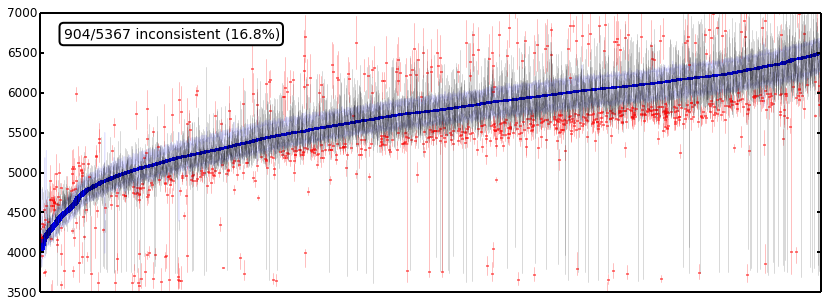

In [105]:
huber_compare(query='4000 < teff < 6500')

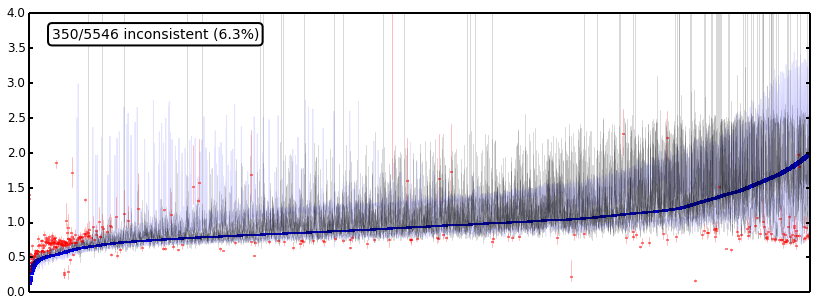

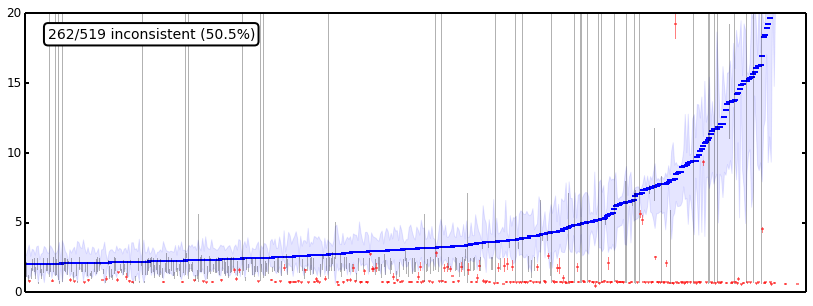

In [106]:
huber_compare(prop='radius', query='radius < 2', ylim=(0,4));
huber_compare(prop='radius', query='2 < radius', ylim=(0,20), lw=1)

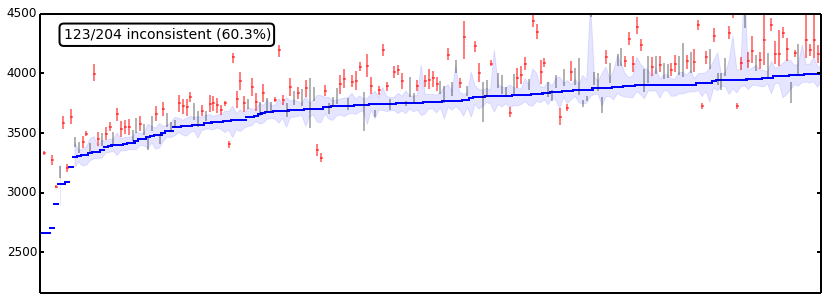

In [107]:
huber_compare(query='teff < 4000', lw=2)

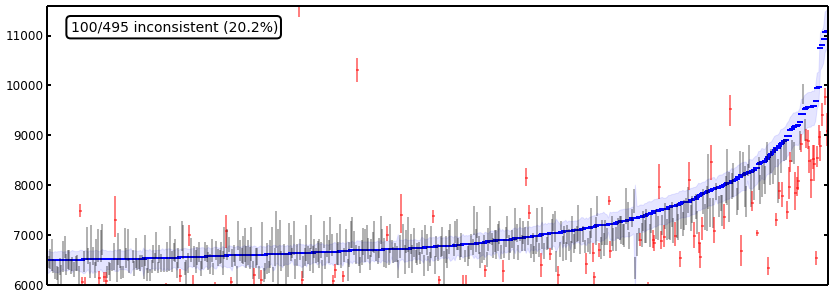

In [108]:
huber_compare(query='6500 < teff', lw=2)